# Antes de empezar ... ¿qué tipo de datos tengo?

## Manejo de datos ausentes

In [2]:
import pandas as pd
ufo = pd.read_csv('https://raw.githubusercontent.com/AngelBerihuete/introstats/master/datasets/ufo.csv')
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18241 entries, 0 to 18240
Data columns (total 5 columns):
City               18216 non-null object
Colors Reported    2882 non-null object
Shape Reported     15597 non-null object
State              18241 non-null object
Time               18241 non-null object
dtypes: object(5)
memory usage: 712.6+ KB


In [2]:
ufo.tail().values # Miramos el archivo CSV para cotejar el DataFrame

array([['Grant Park', nan, 'TRIANGLE', 'IL', '12/31/2000 23:00'],
       ['Spirit Lake', nan, 'DISK', 'IA', '12/31/2000 23:00'],
       ['Eagle River', nan, nan, 'WI', '12/31/2000 23:45'],
       ['Eagle River', 'RED', 'LIGHT', 'WI', '12/31/2000 23:45'],
       ['Ybor', nan, 'OVAL', 'FL', '12/31/2000 23:59']], dtype=object)

__NaN__ significa __Not a Number__ y ```pandas```, por razones computacionales, se etiqueta de esta manera al valor ausente (Hay que recordar que dato ausente en lenguaje ```R``` es __NA__: Not Available).

En la documentación de ```pandas``` aparece

> By “missing” we simply mean null or “not present for whatever reason”



In [3]:
ufo.isnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,False,True,False,False,False
18237,False,True,False,False,False
18238,False,True,True,False,False
18239,False,False,False,False,False
18240,False,True,False,False,False


In [4]:
ufo.notnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,True,False,True,True,True
18237,True,False,True,True,True
18238,True,False,False,True,True
18239,True,True,True,True,True
18240,True,False,True,True,True


In [5]:
ufo.isnull().sum()

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

Recordad que de forma predefinida ```python ufo.isnull.sum(axis=0)```, es decir, para cada variable busca los valores ```True``` de cada fila y los suma.

In [6]:
ufo.loc[ufo.City.isnull(),:] # Selecciono los datos que son NaN en City

,City,Colors Reported,Shape Reported,State,Time
21,NaN,NaN,NaN,LA,8/15/1943 0:00
22,NaN,NaN,LIGHT,LA,8/15/1943 0:00
204,NaN,NaN,DISK,CA,7/15/1952 12:30
241,NaN,BLUE,DISK,MT,7/4/1953 14:00
613,NaN,NaN,DISK,NV,7/1/1960 12:00
1877,NaN,YELLOW,CIRCLE,AZ,8/15/1969 1:00
2013,NaN,NaN,NaN,NH,8/1/1970 9:30
2546,NaN,NaN,FIREBALL,OH,10/25/1973 23:30
3123,NaN,RED,TRIANGLE,WV,11/25/1975 23:00
4736,NaN,NaN,SPHERE,CA,6/23/1982 23:00


### ¿Qué puedo hacer con los datos ausentes? Quitarlos o cambiarlos.

In [7]:
ufo.shape

(18241, 5)

In [8]:
ufo.dropna(how='any').shape # Elimino cualquier fila que tenga NaN

(2486, 5)

In [9]:
ufo.dropna(how='all').shape # Elimino las filas que tengan TODOS sus elementos sean NaN

(18241, 5)

In [10]:
ufo.dropna(subset=['City', 'Shape Reported'], how='any').shape # Elimino cualquier fila que tenga NaN en ciertas variables

(15576, 5)

In [11]:
ufo['Shape Reported'].value_counts() # De forma predefinida no se cuentan los valores NaN

LIGHT        2803
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
VARIOUS       333
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
CRESCENT        2
ROUND           2
PYRAMID         1
FLARE           1
DOME            1
HEXAGON         1
Name: Shape Reported, dtype: int64

In [12]:
ufo['Shape Reported'].value_counts(dropna=False)

LIGHT        2803
NaN          2644
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
VARIOUS       333
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
ROUND           2
CRESCENT        2
FLARE           1
PYRAMID         1
DOME            1
HEXAGON         1
Name: Shape Reported, dtype: int64

Vamos a cambiar los __NaN__ por el valor __VARIOUS__

In [13]:
ufo['Shape Reported'].fillna(value='VARIOUS', inplace=True)

In [14]:
ufo['Shape Reported'].value_counts(dropna=False)

VARIOUS      2977
LIGHT        2803
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
CRESCENT        2
ROUND           2
FLARE           1
DOME            1
PYRAMID         1
HEXAGON         1
Name: Shape Reported, dtype: int64

# Vale, ya sé qué tipo de datos tengo, ¿cómo puedo describirlos o resumirlos?

## Describiendo una variable cualitativa (factor con varios niveles)

In [3]:
movies = pd.read_csv('https://raw.githubusercontent.com/AngelBerihuete/introstats/master/datasets/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [16]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
star_rating       979 non-null float64
title             979 non-null object
content_rating    976 non-null object
genre             979 non-null object
duration          979 non-null int64
actors_list       979 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


In [17]:
movies.genre.describe()

count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

In [18]:
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [19]:
movies.genre.value_counts(normalize=True)

Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Adventure    0.076609
Animation    0.063330
Horror       0.029622
Mystery      0.016343
Western      0.009193
Thriller     0.005107
Sci-Fi       0.005107
Film-Noir    0.003064
Family       0.002043
History      0.001021
Fantasy      0.001021
Name: genre, dtype: float64

In [20]:
movies.genre.value_counts(normalize=True).head() # Vuelve a ser una Series

Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Name: genre, dtype: float64

In [21]:
movies.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [22]:
movies.genre.nunique()

16

In [23]:
pd.crosstab(movies.genre, movies.content_rating)
#pd.crosstab(movies.genre, movies.content_rating, normalize = 'all')
#pd.crosstab(movies.genre, movies.content_rating, normalize = 'index')
#pd.crosstab(movies.genre, movies.content_rating, normalize = 'columns')

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X
genre,,,,,,,,,,,,
Action,3,1,1,0,4,1,11,44,67,0,3,0
Adventure,3,2,0,0,5,1,21,23,17,0,2,0
Animation,3,20,0,0,3,0,25,5,5,0,1,0
Biography,1,2,1,0,1,0,6,29,36,0,0,0
Comedy,9,2,1,1,16,3,23,23,73,0,4,1
Crime,6,0,0,1,7,1,6,4,87,0,11,1
Drama,12,3,0,4,24,1,25,55,143,1,9,1
Family,0,1,0,0,0,0,1,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,1,0,0,0


Populating the interactive namespace from numpy and matplotlib


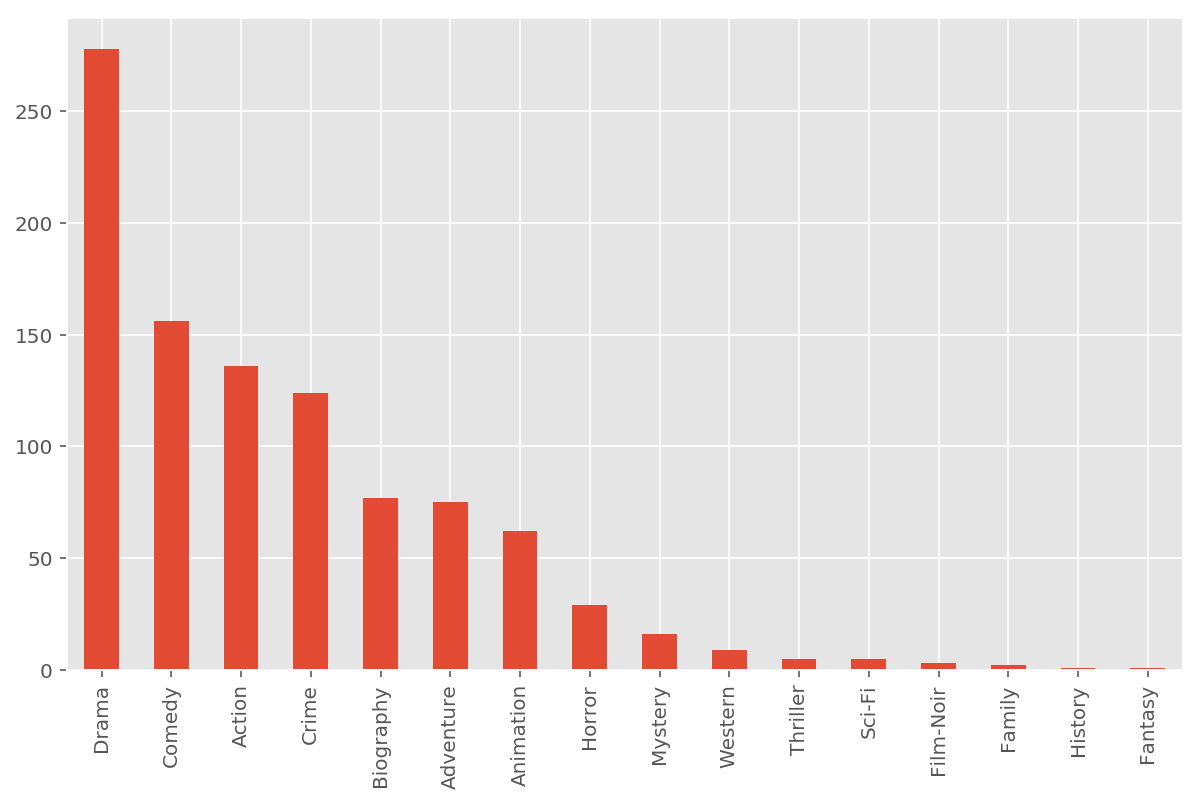

In [25]:
# To see the plots inline, even if you have not started the notebook via "ipython notebook --pylab=inline"
%pylab inline
%config InlineBackend.figure_format = 'retina' #[Truco] Resolución para pantallas HDPI

pylab.rcParams['figure.figsize'] = (10, 6) #
plt.style.use('ggplot')

movies.genre.value_counts().plot(kind='bar'); # [Truco] Punto y coma final

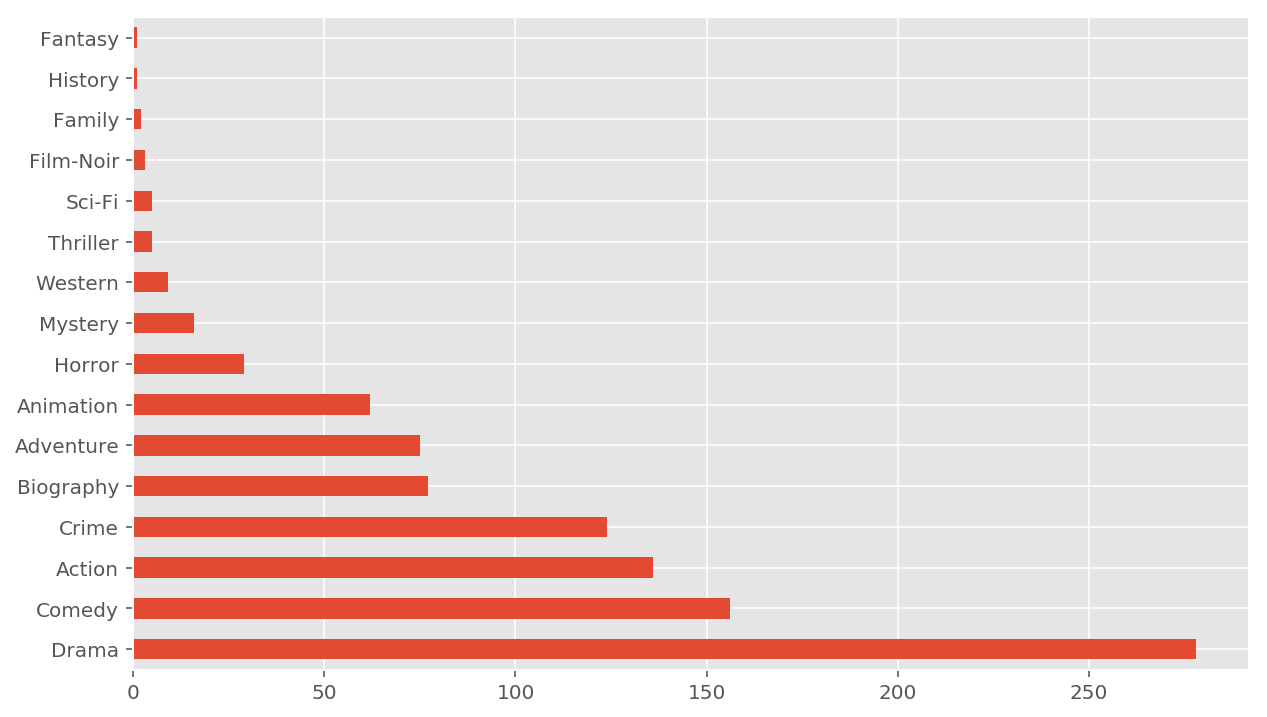

In [27]:
movies.genre.value_counts().plot(kind='barh');

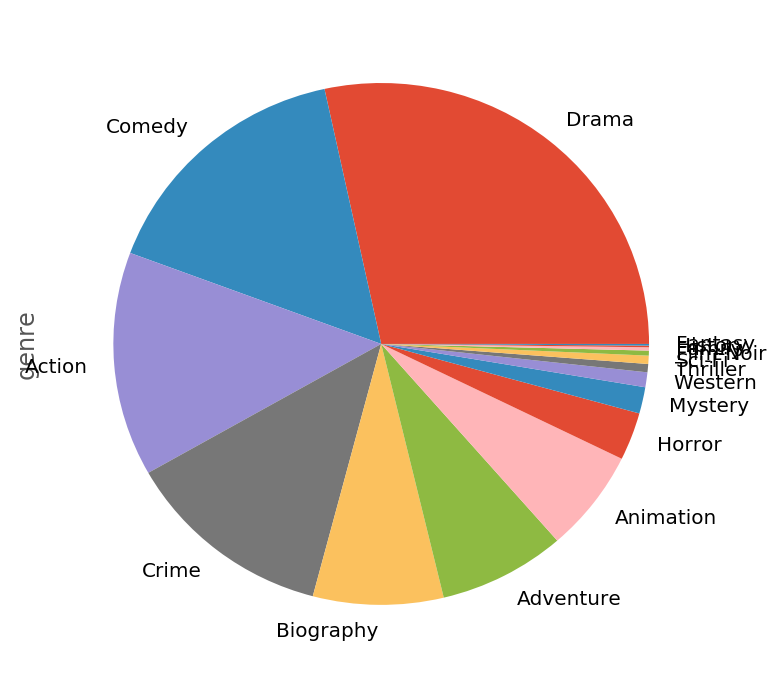

In [28]:
movies.genre.value_counts().plot(kind='pie', figsize=(6, 6));

## Describiendo una variable cuantitativa

Todas las medidas estadísticas presentadas se obtienen directamente a partir de los valores de las muestras. No utilizaremos tablas de frecuencias. En caso de tener una tabla de frecuencias para realizar cálculos, obtendremos la muestra a partir de los valores de la variable (o marca de clase en el caso de intervalos) y sus frecuencias absolutas.

In [4]:
drinks = pd.read_csv('https://raw.githubusercontent.com/AngelBerihuete/introstats/master/datasets/drinks.csv')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [30]:
drinks.beer_servings.describe()

count    193.000000
mean     106.160622
std      101.143103
min        0.000000
25%       20.000000
50%       76.000000
75%      188.000000
max      376.000000
Name: beer_servings, dtype: float64

In [31]:
# Tabla de frecuencias: distribución de los datos

intervalos = np.arange(0, 376, 25) # primero creamos los intervalos.
frec = pd.cut(drinks.beer_servings, intervalos) # luego asignamos cada valor al intervalo correspondiente
tabla_frec = pd.value_counts(frec) #por último hacemos el recuento de los intervalos para armar la tabla de frecuencia.
#tabla_frec = pd.value_counts(frec, normalize=True)
tabla_frec

(0, 25]       44
(25, 50]      20
(75, 100]     18
(50, 75]      17
(225, 250]    11
(125, 150]    11
(175, 200]    10
(150, 175]     9
(100, 125]     9
(200, 225]     8
(275, 300]     7
(325, 350]     5
(250, 275]     5
(300, 325]     2
(350, 375]     1
Name: beer_servings, dtype: int64

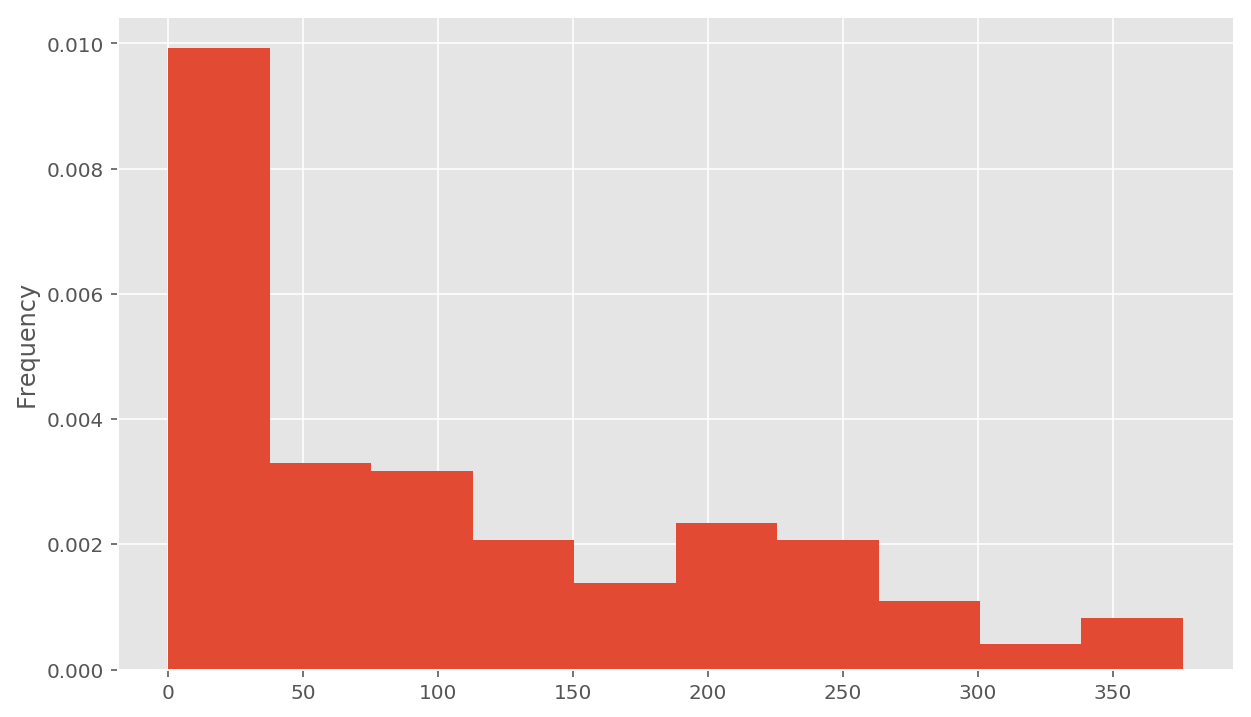

In [32]:
drinks.beer_servings.plot(kind='hist', normed=True); # Mejor densidades si hay intervalos con diferente longitud!!!
#drinks.beer_servings.plot(kind='hist')
#drinks.beer_servings.plot(kind='hist', bins = 5)

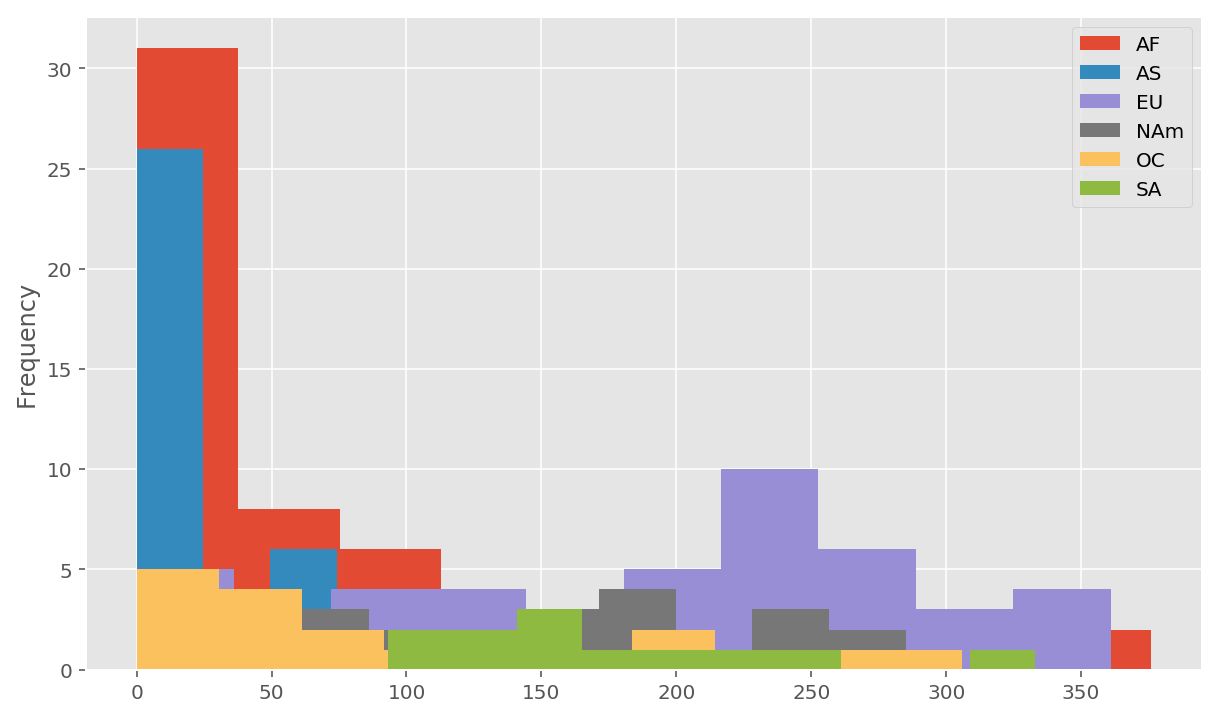

In [33]:
drinks.groupby('continent').beer_servings.plot(kind='hist', legend = True);

## Medidas de posición centrales (medidas de centralización)

Las medidas de posición central sirven para representar globalmente el comportamiento de los datos observados y localizar la distribución de frecuencias.

### Media

Dada la distribución de frecuencias $\{x_i\}_{i=1,2,...,N}$,
se llama media aritmética al valor: $$\overline{x} =
\displaystyle{\frac{\displaystyle{\sum_{i=1}^N
x_i}}{N}}$$

#### A tener en cuenta:

1. Esta medida utiliza todos los valores de la variable (los valores ausentes no los tiene en cuenta).
2. Valores de la variable anormalmente extremados pueden distorsionar la media aritmética. La solución será eliminarlos o calcular otra medida de posición que no se vea afectada por los mismos.


In [34]:
drinks.mean()

beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

In [35]:
drinks.beer_servings.mean()

106.16062176165804

In [36]:
drinks.groupby('continent').beer_servings.mean()

continent
AF      61.471698
AS      37.045455
EU     193.777778
NAm    145.434783
OC      89.687500
SA     175.083333
Name: beer_servings, dtype: float64

In [37]:
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NAm,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


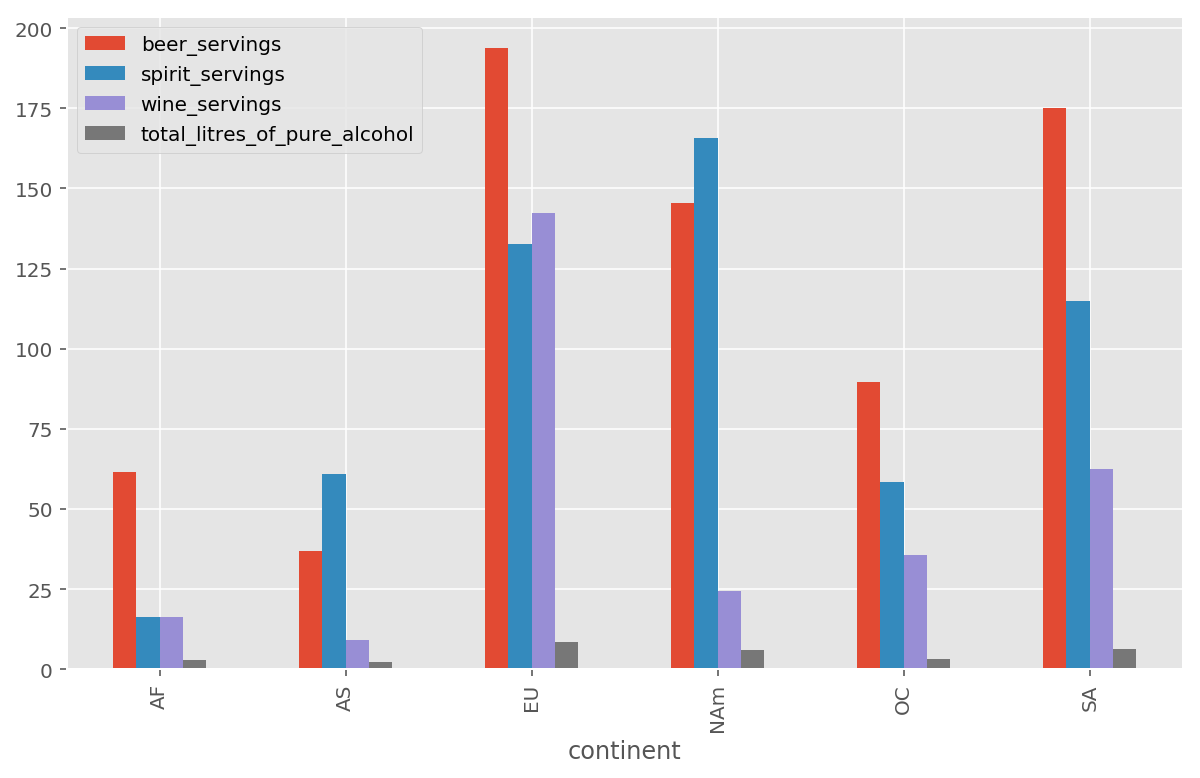

In [38]:
drinks.groupby('continent').mean().plot(kind='bar');

In [39]:
drinks.mean()

beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

### Mediana

La mediana, $M_e$, es un valor tal que, ordenados los valores de
la distribución de menor a mayor, separa a los mismos en dos
partes que contienen el mismo número de datos.


In [40]:
drinks.median()

beer_servings                   76.0
spirit_servings                 56.0
wine_servings                    8.0
total_litres_of_pure_alcohol     4.2
dtype: float64

### Moda

La moda, $M_o$, es el valor de la variable que más se repite. Existen distribuciones que pueden tener más de una moda. Distribuciones no agrupadas en intervalos. La moda es el valor de la variable de mayor frecuencia absoluta.

In [41]:
drinks.beer_servings.mode()

0    0
dtype: int64

## Medidas de posición no centrales

Los cuantiles son valores que, una vez ordenada de menor a mayor
la distribución, la dividen en partes iguales, es decir, en
intervalos que comprenden el mismo número de valores.

### Cuartiles

Los cuartiles. Son tres valores que, una vez ordenada de menor a
mayor la distribución, la dividen en cuatro partes iguales. Es
decir, en cuatro intervalos dentro de cada uno de los cuales está
contenido un $25 \%$ de los valores. Los representaremos por
$Q_{r/4}$ con $r=1,2,3$. (Observemos que $Q_{1/2}=M_e$)

### Deciles

Los deciles. Son nueve valores que, una vez ordenada de menor a
mayor la distribución, la dividen en diez partes iguales. Dentro
de cada una está contenido un $10 \%$ de los valores de la
distribución. Los expresaremos como $Q_{r/10}$ con $r=1,2, ...,9$.
($Q_{5/10}=M_e$)

### Percentiles

Los percentiles. Son 99 valores que dividen a la distribución en
cien partes iguales, una vez ordenada de menor a mayor. De este
modo, entre dos percentiles consecutivos encontramos un $1 \%$ de
los datos. Escribiremos $Q_{r/100}$ con $r=1,2, ...,99$.
($Q_{50/100}=M_e$)

In [42]:
drinks.beer_servings.quantile([.20, .30])

0.2    13.8
0.3    25.0
Name: beer_servings, dtype: float64

## Medidas de dispersión

Se llama dispersión o variabilidad, a la menor o mayor separación
de los valores respecto a otro que se pretende sea la síntesis.

### Medidas de dispersión absoluta

El __recorrido__ es la diferencia entre el mayor y el menor valor de
la variable: $$R= \max _ix_i - \min _ix_i$$

In [43]:
drinks.max(numeric_only=True) - drinks.min(numeric_only=True)

beer_servings                   376.0
spirit_servings                 438.0
wine_servings                   370.0
total_litres_of_pure_alcohol     14.4
dtype: float64

In [44]:
drinks.groupby('continent').beer_servings.max()

continent
AF     376
AS     247
EU     361
NAm    285
OC     306
SA     333
Name: beer_servings, dtype: int64

In [45]:
drinks.groupby('continent').beer_servings.agg(['count', 'min', 'max'])

,count,min,max
continent,,,
AF,53,0,376
AS,44,0,247
EU,45,0,361
NAm,23,1,285
OC,16,0,306
SA,12,93,333


* Ventajas del recorrido
    * Es una medida de fácil cálculo
    * Es útil en situaciones en las que se requiera medir la dispersión
    con mucha frecuencia y sobre pocos valores.

* Inconvenientes del recorrido
    * Total dependencia de los valores extremos de la serie de datos.
    * No tiene en cuenta los valores intermedios de la variable, así que
    puede no ser muy precisa.
    * No puede ser calculado si el valor máximo o el mínimo no están
    determinados.

El __recorrido intercuartílico__ (también llamado __rango intercuartílico__) nos indica la amplitud del intervalo donde
están comprendidos el $50 \%$ central de los valores, y se calcula:
$$R_I=Q_{3/4}-Q_{1/4}$$

Presenta como ventaja respecto al recorrido, la eliminación del posible
efecto que pudieran tener algunos valores extremos.

In [46]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [47]:
drinks.describe().loc['75%', 'beer_servings'] - drinks.describe().loc['25%', 'beer_servings']

168.0

### Diagrama de caja y bigotes

Se trata de una síntesis gráfica de una distribución en la que
intervienen las siguientes medidas: media aritmética, mediana, cuartiles
primero y tercero. Su construcción es como sigue:

1.  Tomamos una escala que contenga el recorrido de la variable.

2.  Se dibuja una caja, rectángulo, cuyos lados verticales vayan desde
    el primer hasta el tercer cuartil.

3.  Dibujamos en el interior de la caja una barra vertical en la
    posición de la mediana y una marca allí donde se sitúe la media
    aritmética.

4.  Desde los lados verticales de la caja se dibujan dos segmentos
    horizontales (los bigotes) que se extienden a derecha e izquierda
    hasta los valores más alejados de la variable que no que superen
    $1,5$ veces el recorrido intercuartílico.

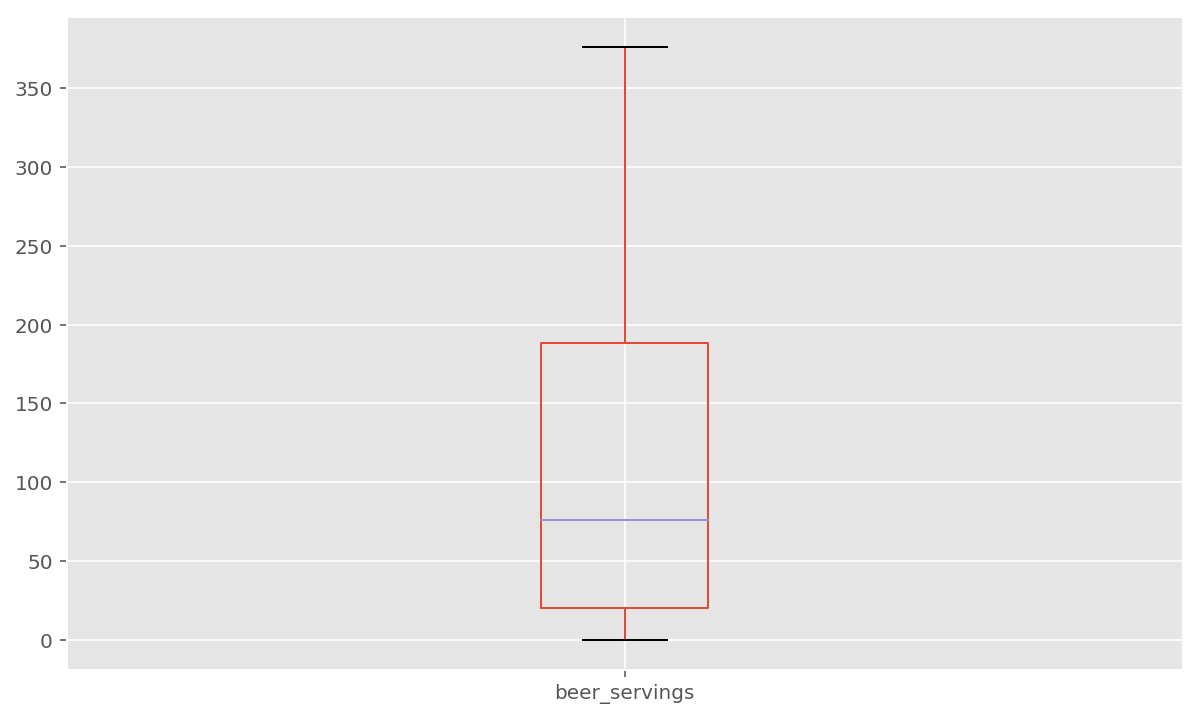

In [48]:
drinks.boxplot(column='beer_servings');

1.  Con esta representación se consigue una impresión rápida de
    ciertas características básicas de un conjunto de datos: posición,
    dispersión y simetría o asimetría.

2.  La caja del diagrama contiene la mitad central de los datos.

3.  A medida que la mediana esté más centrada en la caja, y cuanto más
    similares sean las longitudes de los bigotes, menos asimétrica es la
    distribución.

4.  Los valores que quedan fuera del diagrama, y que por tanto se alejan
    del primer y tercer cuartil más de $1,5$ veces el recorrido
    intercuartílico, se consideran valores atípicos (outliers).


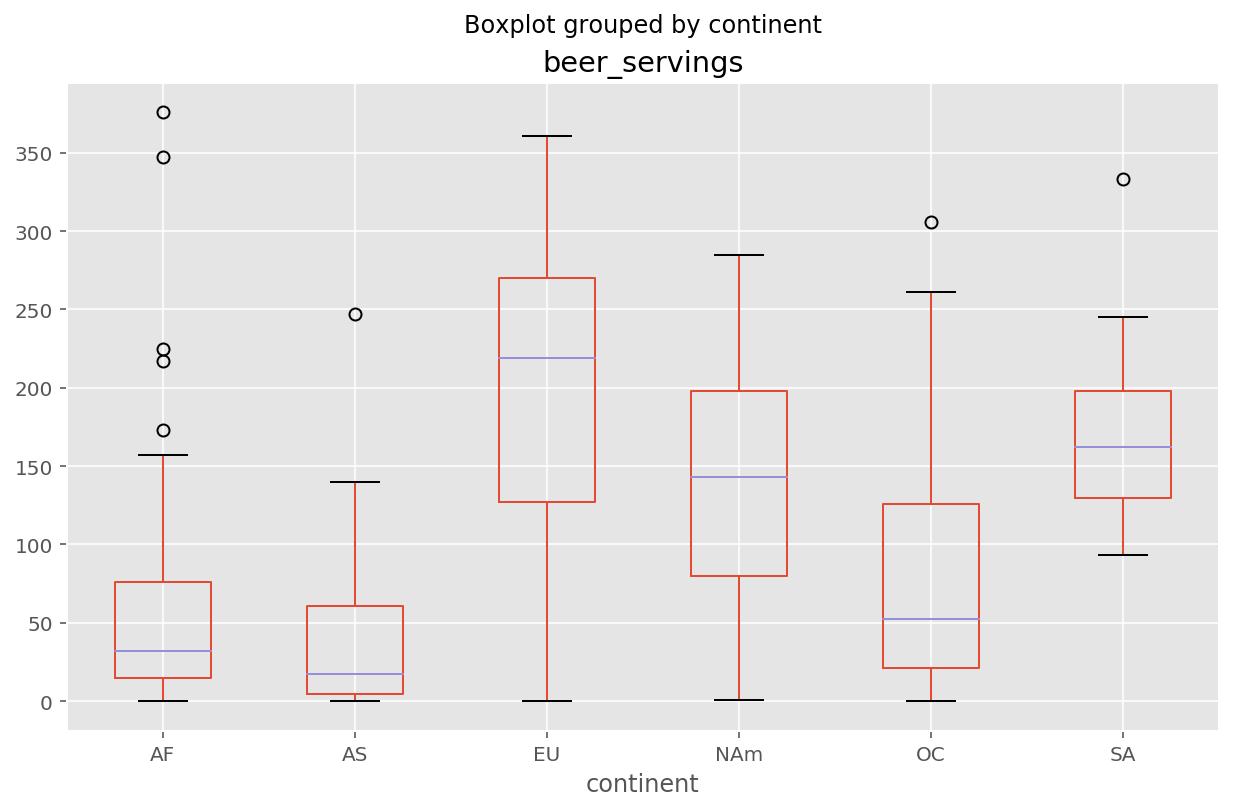

In [49]:
drinks.boxplot(column='beer_servings', by='continent');

#### Varianza y desviación típica

Son las dos medidas de dispersión absoluta más importantes.

La varianza es la media aritmética de los cuadrados de las desviaciones
de los datos respecto a la media. Es decir,
$$s^2=\displaystyle{\frac{1}{N}\sum_{i=1}^N (x_i-\overline{x})^2}$$

A veces se usa también la cuasivarianza, definida por:
$$s_c^2=\displaystyle{\frac{1}{N-1} \sum_{i=1}^N (x_i-\overline{x})^2}$$ 

Evidentemente: $Ns^2= (N-1) \cdot s_c^2$

__[Nota]__ Si $N$ es grande, entonces $s^2$ y $s_c^2$ son prácticamente iguales.

#### Propiedades de la varianza

1.  La varianza es siempre mayor o igual que cero, por ser suma de
    cuadrados, y se anula solamente cuando todos los valores de la
    variable son iguales entre sí.

2.  __(Teorema de König)__ La varianza es la medida cuadrática de dispersión óptima ya que,
    para cualquier valor $p$ se verifica que:
    $$s^2=\displaystyle{\frac{1}{N} \sum_{i=1}^N (x_i-\overline{x})^2} \leq \frac{1}{N} \displaystyle{\sum_{i=1}^N (x_i-p)^2 \cdot}$$ 

3.  Se verifica que $s^2= \displaystyle{\frac{1}{N}\sum_{i=1}^N x_i^2}- \left( \overline{x} \right) ^2$

4.  Viene expresada en las unidades de la variable elevadas al cuadrado.

Se define la desviación típica como la raíz cuadrada positiva de la
varianza. Es decir: 

$$ s=+\sqrt{s^2}=+\displaystyle{\sqrt{\displaystyle{\frac{1}{N}\sum_{i=1}^N
(x_i-\overline{x})^2}}}$$

#### Propiedades de la desviación típica

1.  Es siempre mayor o igual que cero.

2.  Es una medida de dispersión óptima.

3.  Valores pequeños de la desviación típica indican poca dispersión de
    las observaciones con respecto a la media.

4.  Viene medida en las mismas unidades de la variable.

5.  El intervalo $(\overline{x}-2s,\overline{x}+2s)$ contiene al menos
    el 75 % de los valores de la distribución.

In [50]:
drinks.var() # Return unbiased variance over requested axis.

beer_servings                   10229.927191
spirit_servings                  7794.119765
wine_servings                    6351.707200
total_litres_of_pure_alcohol       14.237779
dtype: float64

In [51]:
drinks.std() # Return sample standard deviation

beer_servings                   101.143103
spirit_servings                  88.284312
wine_servings                    79.697598
total_litres_of_pure_alcohol      3.773298
dtype: float64

### Medidas de dispersión relativa

Supongamos que tenemos dos distribuciones de frecuencias cuyas medidas
de posición son $p_1$ y $p_2$ y queremos saber cuál de las dos es más
representativa. Como tales medidas pueden venir expresadas en distintas
unidades, no podremos comparar la representatividad de ambas utilizando
las medidas de dispersión absoluta.

Es preciso construir medidas de dispersión adimensionales, es decir,
medidas que resulten independientes de la unidad con que se miden los
valores de cada variable. Son las medidas de dispersión relativa.

#### Recorridos

El recorrido relativo viene dado por la expresión:
$$R_r=\displaystyle{\frac{R}{\overline{x}}}=
\displaystyle{\frac{\displaystyle{\max _ix_i - \min
_ix_i}}{\overline{x}}}$$ Nos proporciona el número de veces que el
recorrido contiene a la media aritmética.

El recorrido semiintercuartílico se define como: $$R_{SI}=
\displaystyle{\frac{\displaystyle{\frac{Q_{3/4}-Q_{1/4}}{2}}}{\displaystyle{\frac{Q_{1/4}+Q_{3/4}}{2}}}}=
\displaystyle{\frac{Q_{3/4}-Q_{1/4}}{Q_{1/4}+Q_{3/4}}}$$ Compara la
distancia media entre los cuartiles primero y tercero con el punto medio
de dicho intervalo.

#### El coeficiente de variación de Pearson

Se define por la expresión: $$V=
\displaystyle{\frac{s}{|\overline{x}|}}$$

* Propiedades del coeficiente de variación de Pearson

    * Es una medida adimensional y suele expresarse multiplicada por cien,
    es decir en forma de porcentaje.
    * Representa el número de veces que la desviación típica contiene a
    $|\overline{x}|$. Cuanto mayor es $V$ menos representativa es
    $\overline{x}$.
    * La máxima representatividad de $\overline{x}$ se tiene cuando $V=0$. Dudaremos de la representatividad de $\overline{x}$ si $V>0.5$.
    * Si $\overline{x}=0$, $V$ no es calculable.

In [52]:
drinks.std()/drinks.mean().abs()

beer_servings                   0.952737
spirit_servings                 1.090000
wine_servings                   1.611655
total_litres_of_pure_alcohol    0.799919
dtype: float64

### Simetría

Ahora damos un paso más al intentar precisar la forma de la
distribución. Las medidas de forma se dirigen a elaborar valores que
midan el aspecto de la representación gráfica de la distribución sin
necesidad de llevarla a cabo.

Si por $\overline{x}$ trazamos una perpendicular al eje horizontal y la
tomamos como eje de simetría, diremos que la distribución es simétrica
si existe el mismo número de valores a ambos lados del eje y
equidistantes de él hay pares de valores con la misma frecuencia.

Si la distribución no es simétrica, puede ocurrir:

1.  Que los valores bajos de la variable sean los más frecuentes.
    Gráficamente observaríamos una cola alargada hacia la derecha y la
    distribución se dirá que es asimétrica a derechas o que tiene
    asimetría positiva.

2.  Que los valores altos sean los más frecuentes. Gráficamente se
    observaría una cola alargada hacia la izquierda y la distribución se
    dirá que es asimétrica a izquierdas o que tiene asimetría negativa.

En las distribuciones simétricas, las desviaciones de los valores a la
izquierda de la media son igualmente frecuentes que las de los valores a
la derecha y, por tanto, todos los promedios calculados con potencias
impares de ellas serán nulos.

No debemos considerar potencias pares porque nos interesa tener en
cuenta el signo de las desviaciones a la media. Tampoco debemos usar el
promedio de las desviaciones a la media, ya que es cero en cualquier
caso. Por tanto, recurriremos al promedio calculado con las potencias
terceras de las desviaciones. Este promedio acentúa las desviaciones a
la media de los valores altos y bajos de la variable cuando no hay
simetría, representando así un índice del sesgo de la distribución.

#### Coeficiente de asimetría de Fisher

Se define el coeficiente de asimetría de Fisher como la expresión:
$$g_1= \frac{\displaystyle{\sum_{i=1}^N (x_i-\overline{x})^3}}{N s^3}$$

El coeficiente de asimetría de Fisher es una medida adimensional.

1.  Si la distribución es simétrica $\Rightarrow$
    $\displaystyle{\sum_{i=1}^k (x_i-\overline{x})^3}$ $\Rightarrow$
    $g_1=0$. El recíproco no es cierto, en general, como podemos
    observar en el ejemplo siguiente:

    Se considera la distribución siguiente:
    $$\begin{array}{|c|c|c|c|c|c|}
      \hline
       l_{i-1}-l_i & x_i & n_i & x_in_i & (x_i-\overline{x})^3 \cdot n_i & h_i \\
        \hline\hline
       -1 - 1 & 0 & 2 &  0 & -128 & 2/12 \\
        4-6 & 5 & 3 & 15 & 3 & 3/12  \\
        8- 10 & 9 & 1 & 9 & 125 & 1/12  \\
            \hline
         & & 6 & 24 & 0 & \\
        \hline
      \end{array}$$ cuyo histograma es:

    <img src='figures/eje-283.png'\>

    y que, claramente, muestra una distribución no simétrica y para la
    que observamos en la tabla que
    $\displaystyle{\sum_{i=1}^k (x_i-\overline{x})^3}=0$ $(\Rightarrow$
    $g_1=0)$.

2.  Si $g_1>0$ debe ser que la distribución está desplazada a la derecha
    de $\overline{x}$ $\Rightarrow$ Asimétrica a derechas.

3.  Si $g_1<0$ debe ser que la distribución está desplazada a la
    izquierda de $\overline{x}$ $\Rightarrow$ Asimétrica a izquierdas.

In [53]:
drinks.skew() # Return unbiased skew over requested axis Normalized by N-1

beer_servings                   0.816881
spirit_servings                 1.292148
wine_servings                   1.909473
total_litres_of_pure_alcohol    0.428704
dtype: float64

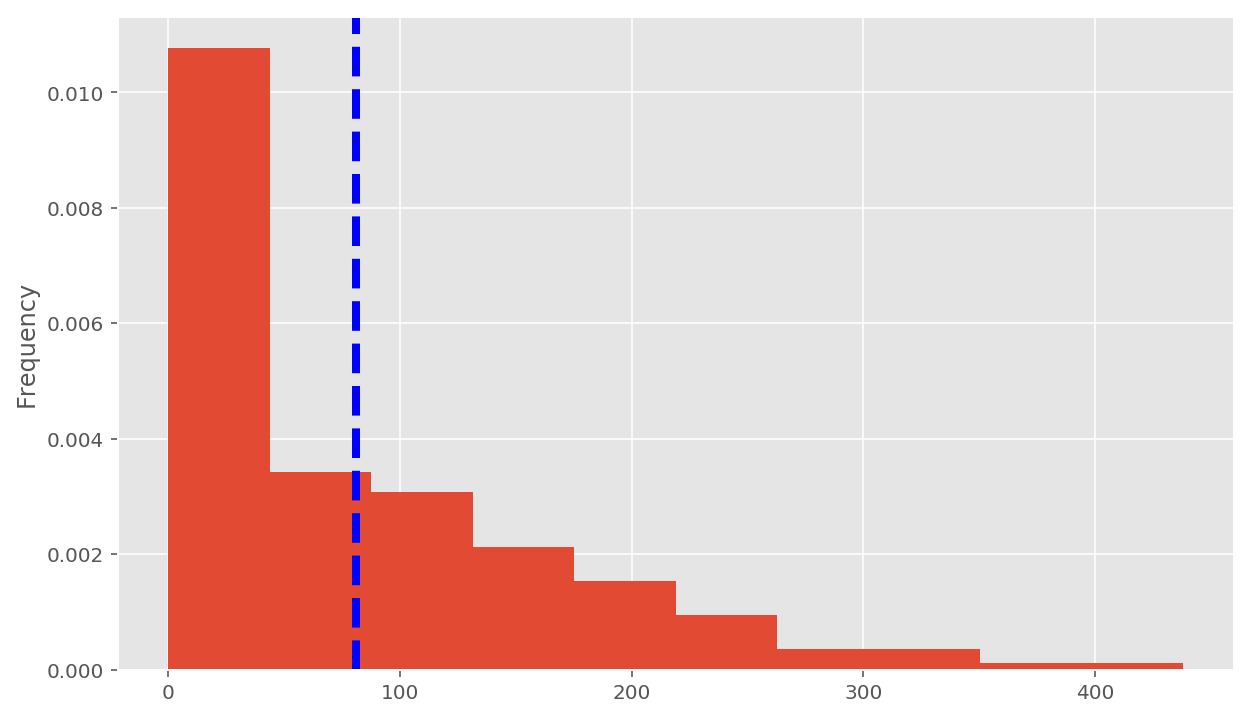

In [55]:
drinks.spirit_servings.plot(kind='hist', normed=True)
m = drinks.spirit_servings.mean()
plt.axvline(m, color = 'b', linestyle = 'dashed', linewidth = 4);

# ¿Tengo que saber algo más para describir mis datos?

In [56]:
import scipy.stats as stats
import seaborn as sns
sns.set_context('notebook')
sns.set_style('darkgrid')

In [57]:
# media geometrica
# stats.gmean(faithful['eruptions'])
# stats.hmean(faithful['eruptions']) # Media armónica
# media truncada, recortando el 10 superior e inferior
# stats.trim_mean(faithful['eruptions'], .10)
# par= sns.pairplot(faithful)

Otros detalles de interés
-------------------------

### Efecto sobre la media aritmética de una transformación lineal

Nos disponemos a estudiar cómo se ve afectada la media ante una
transformación lineal que puedan sufrir los datos.

1.  Dada una distribución de frecuencias $\{(x_i;n_i)\}_{i=1,2,...,k}$,
    vamos a considerar una nueva distribución
    $\{(x'_i;n_i)\}_{i=1,2,...,k}$, donde $x'_i= x_i +b$ para todo valor
    de $i$. Se verifica que: $$\overline{x'} =
    \displaystyle{\frac{\displaystyle{\sum_{i=1}^k x'_in_i}}{N}}=
    \displaystyle{\frac{\displaystyle{\sum_{i=1}^k (x_i+b)n_i}}{N}}=
    \displaystyle{\frac{\displaystyle{\sum_{i=1}^k x_in_i}}{N}} +b
    \cdot \displaystyle{\frac{\displaystyle{\sum_{i=1}^k n_i}}{N}}=
    \overline{x}+b$$ Por tanto, si a todos los valores de una variable
    le sumamos una constante $b$, la media aritmética queda también
    aumentada en esa constante. Es decir, **la media aritmética queda
    afectada por los cambios de origen**.

2.  Dada una distribución de frecuencias $\{(x_i;n_i)\}_{i=1,2,...,k}$,
    vamos a considerar una nueva distribución
    $\{(x'_i;n_i)\}_{i=1,2,...,k}$, donde $x'_i= ax_i$ para todo valor
    de $i$. Se verifica que: $$\overline{x'} =
    \displaystyle{\frac{\displaystyle{\sum_{i=1}^k x'_in_i}}{N}}=
    \displaystyle{\frac{\displaystyle{\sum_{i=1}^k (ax_i)n_i}}{N}}= a
    \cdot \displaystyle{\frac{\displaystyle{\sum_{i=1}^k x_in_i}}{N}}= a
    \cdot \overline{x}$$ Por tanto, si todos los valores de una variable
    los multiplicamos por una constante $a$, la media aritmética queda
    también multiplicada por esa constante. Es decir, **la media
    aritmética queda afectada por los cambios de escala**.

#### Consecuencia

Dada una distribución de frecuencias $\{(x_i;n_i)\}_{i=1,2,...,k}$, si
consideramos una nueva distribución $\; \{(x'_i;n_i)\}_{i=1,2,...,k}$
que sea una transformación lineal de la primera, es decir, $x'_i=ax_i+b$
para todo valor de $i$, entonces se verifica que:
$$\overline{x'}=a\overline{x}+b$$

Si tenemos $$\left. \begin{array}{c}
  \overline{x}=10 \\
  x'_i=3x_i+2
\end{array}\right\} \Rightarrow \overline{x'}=3\overline{x}+2=3 \times 10 +2= 32$$

### Efecto sobre la varianza de una transformación lineal

A continuación estudiemos cómo se ven afectadas la varianza, y la
desviación típica, ante una transformación lineal que puedan sufrir los
datos.

1.  Dada una distribución de frecuencias $\{(x_i;n_i)\}_{i=1,2,...,k}$,
    vamos a considerar una nueva distribución
    $\{(x'_i;n_i)\}_{i=1,2,...,k}$, donde $x'_i= x_i +b$ para todo valor
    de $i$. Se verifica que: $$s'^2 =$$ $$=\displaystyle{\sum_{i=1}^k
    (x'_i-\overline{x'})^2 \cdot \frac{n_i}{N}}=
    \displaystyle{\sum_{i=1}^k [x_i+b-(\overline{x}+b)]^2 \cdot
    \frac{n_i}{N}}= \displaystyle{\sum_{i=1}^k (x_i-\overline{x})^2
    \cdot \frac{n_i}{N}}=s^2$$ Por tanto, si a todos los valores de una
    variable le sumamos una constante $b$, la varianza (y la desviación
    típica) no varían. Es decir, **a la varianza (y a la desviación
    típica) no le afectan los cambios de origen**.

2.  Dada una distribución de frecuencias $\{(x_i;n_i)\}_{i=1,2,...,k}$,
    vamos a considerar una nueva distribución
    $\{(x'_i;n_i)\}_{i=1,2,...,k}$, donde $x'_i= ax_i$ para todo valor
    de $i$. Se verifica que: $$s'^2=$$ $$= \displaystyle{\sum_{i=1}^k
    (x'_i-\overline{x'})^2 \cdot \frac{n_i}{N}}=
    \displaystyle{\sum_{i=1}^k [ax_i-(a \overline{x})]^2 \cdot
    \frac{n_i}{N}}= a^2 \cdot \displaystyle{\sum_{i=1}^k
    (x_i-\overline{x})^2 \cdot \frac{n_i}{N}}=a^2 \cdot s^2$$ Por tanto,
    si todos los valores de una variable los multiplicamos por una
    constante, la varianza queda multiplicada por el cuadrado de la
    constante (y la desviación típica por el valor absoluto de dicha
    constante).

#### Consecuencia

Dada una distribución de frecuencias $\{(x_i;n_i)\}_{i=1,2,...,k}$, si
consideramos una nueva distribución $\{(x'_i;n_i)\}_{i=1,2,...,k}$, que
sea una transformación lineal de la primera, es decir, $x'_i=ax_i+b$
para todo valor de $i$, entonces se verifica que: $$s'^2= a^2 s^2 (s'=
\mid a \mid s)$$

Si tenemos $$\left. \begin{array}{c}
  s^2=2 \\
  x'_i=3x_i+2
\end{array}\right\} \Rightarrow s'^2=3^2 s^2=9 \times 2= 18$$

### Normalización o tipificación

Desde el punto de vista estadístico, la transformación lineal más
importante es la conocida como tipificación o normalización.

Dada una variable estadística $X$, con media $\overline{x}$ y desviación
típica $s_X$, entonces la tipificación consiste en la transformación:
$$z= \displaystyle{\frac{x-\overline{x}}{s_X}}=
\displaystyle{\frac{1}{s_X}}\cdot x + \displaystyle{\left(
\frac{-\overline{x}}{s_X} \right)}$$

1.  Teniendo en cuenta como afectan a la media y a la varianza las
    transformaciones lineales, se tiene que $\overline{z}=0$ y
    $s_Z^2=1$.

2.  La variable tipificada expresa el número de desviaciones típicas que
    cada observación dista de la media. Así podremos comparar la
    posición relativa de datos de diferentes distribuciones.